In [1]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import pyfits

import matplotlib.pyplot as plt
%matplotlib inline

# READ IN DATA

In [2]:
burst        = 'bn080916009'
modName      = 'grbm+blackb'
version      = '-02-'
det          = 'G'

if 'L' in det:
    detector = "GBMwLAT"
else:
    detector = "GBM"

data_dir = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir = \
"/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/BXA/%s/%s/"%(burst, detector, modName)

filename = "%s_%s_%s_chain.fits"%(modName, version, det)
fileName = os.path.join(mod_dir, filename)

In [3]:
f        = pyfits.open(fileName)

Dat      = f[1].data
data     = pd.DataFrame(Dat)
data     = data.astype('float64')  # pyfits format needs to be converted to float64

### data holds 4984 sets of parameters with their Fit Statistics.

In [4]:
data[0:5]

,alpha__1,beta__2,tem__3,norm__4,kT__5,norm__6,FIT_STATISTIC
0,-1.313309,-8.529771,2233.760391,0.010978,38.545780,0.000008,-139.408838
1,-1.141458,-8.516176,881.587304,0.014162,41.013334,0.000002,-138.825519
2,-1.262837,-7.104426,2279.714171,0.011420,44.265954,0.000005,-138.585961
3,-1.237525,-3.609701,1098.085895,0.012300,44.813990,0.000004,-138.377547
4,-1.289565,-3.143231,1912.235161,0.011432,42.257085,0.000006,-138.224772


In [5]:
len(data)

4984

---

# We want to find the peak in the histrogram distribution without having to plot it.

### Plotting the parameter distribution for the 'alpha' parameter.

In [6]:
d = data["alpha__1"]

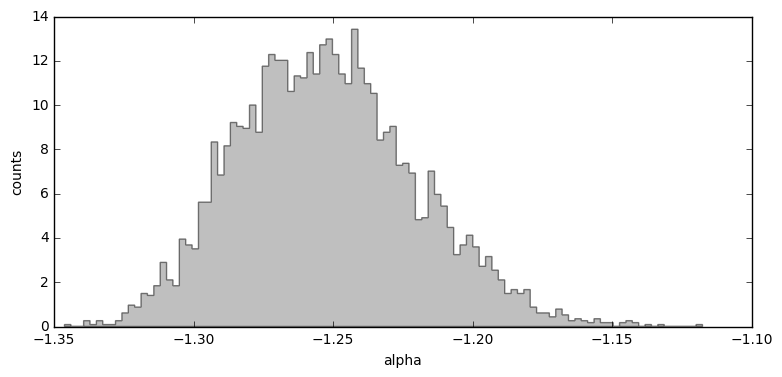

In [7]:
plt.figure(figsize=(9,4))
counts, bins, ignored = plt.hist(d, 100, normed=True, color='grey', align='mid', 
                                 histtype= 'stepfilled', alpha=0.5)

plt.ylabel('counts')
plt.xlabel('alpha')

## If we don't want to plot the data, use numpy.hist

### histo_cts will be the same as counts and bin_edges will be the same as bins.

In [8]:
histo_cts, bin_edges = np.histogram(d, 100, normed=True)

### Plotting both to see that the parameters are the same.

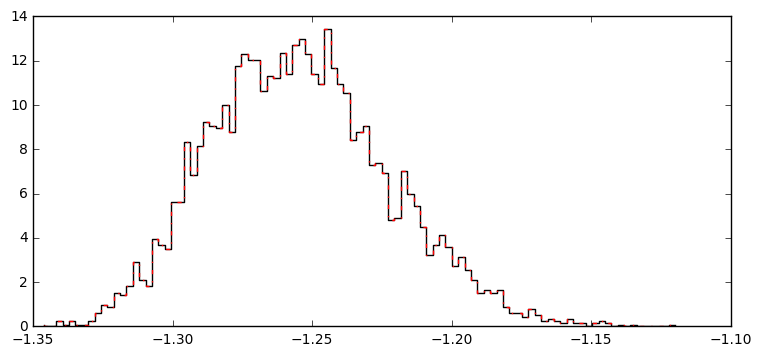

In [9]:
plt.figure(figsize=(9,4))
plt.step(bin_edges[:-1], histo_cts, color='black', linestyle = '-')
plt.step(bins[:-1], counts, color='red', linestyle = '-.')


### Below are the histo_cts vs counts to compare, as well as the bin_edges vs bins to compare.

In [10]:
histo_cts

array([  0.08774243,   0.        ,   0.        ,   0.26322728,
         0.08774243,   0.26322728,   0.08774243,   0.08774243,
         0.26322728,   0.61419698,   0.96516668,   0.87742426,
         1.49162124,   1.40387881,   1.84259094,   2.89550005,
         2.10581822,   1.84259094,   3.94840916,   3.68518189,
         3.50969703,   5.61551526,   5.61551526,   8.33553046,
         6.84390922,   8.16004561,   9.21295472,   9.03746986,
         8.94972744,  10.00263655,   8.77424259,  11.75748507,
        12.28393962,  12.02071234,  12.02071234,  10.61683353,
        11.31877294,  11.23103051,  12.37168205,  11.40651536,
        12.72265175,  12.98587903,  12.28393962,  11.40651536,
        10.96780323,  13.42459116,  11.66974264,  10.96780323,
        10.5290911 ,   8.42327288,   8.77424259,   9.03746986,
         7.28262135,   7.37036377,   6.93165164,   4.82583342,
         4.91357585,   7.01939407,   5.96648496,   5.4400304 ,
         4.47486372,   3.24646976,   3.68518189,   4.12

In [11]:
counts

array([  0.08774243,   0.        ,   0.        ,   0.26322728,
         0.08774243,   0.26322728,   0.08774243,   0.08774243,
         0.26322728,   0.61419698,   0.96516668,   0.87742426,
         1.49162124,   1.40387881,   1.84259094,   2.89550005,
         2.10581822,   1.84259094,   3.94840916,   3.68518189,
         3.50969703,   5.61551526,   5.61551526,   8.33553046,
         6.84390922,   8.16004561,   9.21295472,   9.03746986,
         8.94972744,  10.00263655,   8.77424259,  11.75748507,
        12.28393962,  12.02071234,  12.02071234,  10.61683353,
        11.31877294,  11.23103051,  12.37168205,  11.40651536,
        12.72265175,  12.98587903,  12.28393962,  11.40651536,
        10.96780323,  13.42459116,  11.66974264,  10.96780323,
        10.5290911 ,   8.42327288,   8.77424259,   9.03746986,
         7.28262135,   7.37036377,   6.93165164,   4.82583342,
         4.91357585,   7.01939407,   5.96648496,   5.4400304 ,
         4.47486372,   3.24646976,   3.68518189,   4.12

In [12]:
bin_edges

array([-1.34628638, -1.34399966, -1.34171294, -1.33942623, -1.33713951,
       -1.33485279, -1.33256608, -1.33027936, -1.32799264, -1.32570593,
       -1.32341921, -1.32113249, -1.31884578, -1.31655906, -1.31427234,
       -1.31198563, -1.30969891, -1.30741219, -1.30512548, -1.30283876,
       -1.30055205, -1.29826533, -1.29597861, -1.2936919 , -1.29140518,
       -1.28911846, -1.28683175, -1.28454503, -1.28225831, -1.2799716 ,
       -1.27768488, -1.27539816, -1.27311145, -1.27082473, -1.26853801,
       -1.2662513 , -1.26396458, -1.26167786, -1.25939115, -1.25710443,
       -1.25481771, -1.252531  , -1.25024428, -1.24795757, -1.24567085,
       -1.24338413, -1.24109742, -1.2388107 , -1.23652398, -1.23423727,
       -1.23195055, -1.22966383, -1.22737712, -1.2250904 , -1.22280368,
       -1.22051697, -1.21823025, -1.21594353, -1.21365682, -1.2113701 ,
       -1.20908338, -1.20679667, -1.20450995, -1.20222323, -1.19993652,
       -1.1976498 , -1.19536309, -1.19307637, -1.19078965, -1.18

In [13]:
bins

array([-1.34628638, -1.34399966, -1.34171294, -1.33942623, -1.33713951,
       -1.33485279, -1.33256608, -1.33027936, -1.32799264, -1.32570593,
       -1.32341921, -1.32113249, -1.31884578, -1.31655906, -1.31427234,
       -1.31198563, -1.30969891, -1.30741219, -1.30512548, -1.30283876,
       -1.30055205, -1.29826533, -1.29597861, -1.2936919 , -1.29140518,
       -1.28911846, -1.28683175, -1.28454503, -1.28225831, -1.2799716 ,
       -1.27768488, -1.27539816, -1.27311145, -1.27082473, -1.26853801,
       -1.2662513 , -1.26396458, -1.26167786, -1.25939115, -1.25710443,
       -1.25481771, -1.252531  , -1.25024428, -1.24795757, -1.24567085,
       -1.24338413, -1.24109742, -1.2388107 , -1.23652398, -1.23423727,
       -1.23195055, -1.22966383, -1.22737712, -1.2250904 , -1.22280368,
       -1.22051697, -1.21823025, -1.21594353, -1.21365682, -1.2113701 ,
       -1.20908338, -1.20679667, -1.20450995, -1.20222323, -1.19993652,
       -1.1976498 , -1.19536309, -1.19307637, -1.19078965, -1.18

In [14]:
bins == bin_edges

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)